[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/franckalbinet/mirzai/blob/main/nbs/paper/08_figures_learning_curves.ipynb)

# 5.1. PLSR vs. CNN Learning Curves

> Visualizing the behaviours (performances) of PLSR and CNN models as the number of samples increases

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive',  force_remount=False)
    !pip install mirzai
else:
    %load_ext autoreload
    %autoreload 2

In [ ]:
# Python utils
from pathlib import Path
import pickle

from mirzai.vis.core import (centimeter, PRIMARY_COLOR, 
                             plot_learning_curve, plot_capacity,
                             set_style, DEFAULT_STYLE)
from mirzai.training.core import load_dumps

# Data vis.
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Data science stack
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Utilities

In [ ]:
def reduce(dumps):
    df = pd.concat([pd.DataFrame(perf) for perf in dumps])
    return df.groupby(['n_samples']).agg({'test_score':['mean','std']})

## Input data

To generate the learning curves for both the PLSR and CNN models, run the following notebooks:
* [PLSR Learning curve](paper.plsr.learning_curve.html)
* [CNN Learning curve](paper.cnn.learning_curve.html)

Instead, we load already generated and saved data: `history_pls_learning_curve.pickle` and `history_cnn_learning_curve.pickle`.

### PLSR

In [ ]:
src_dir = Path('dumps/plsr/learning_curve')

In [ ]:
dumps = load_dumps(src_dir)

In [ ]:
df_plsr = reduce(dumps); df_plsr

test_score          
                mean       std
n_samples                     
500         0.357241  0.168292
1000        0.446311  0.064118
2000        0.484049  0.066392
5000        0.563827  0.078549
10000       0.619452  0.030407
20000       0.634474  0.016305
30000       0.633108  0.013739
40132       0.639170  0.012540

### CNN

In [ ]:
src_dir = Path('dumps/cnn/learning_curve')

In [ ]:
dumps = load_dumps(src_dir)

In [ ]:
df_cnn = reduce(dumps); df_cnn.head()

test_score          
                mean       std
n_samples                     
500         0.419518  0.198391
1000        0.453100  0.086281
2000        0.533940  0.054055
5000        0.622144  0.034591
10000       0.679383  0.024025

In [ ]:
history_plsr, history_cnn = [{'nb_samples': df.index.to_numpy(),
                              'r2_mean': df[('test_score', 'mean')].to_numpy(),
                              'r2_std': df[('test_score', 'std')].to_numpy()
                             }
                             for df in [df_plsr, df_cnn]]

In [ ]:
history_plsr

{'nb_samples': array([  500,  1000,  2000,  5000, 10000, 20000, 30000, 40132]),
 'r2_mean': array([0.35724121, 0.44631125, 0.48404897, 0.56382695, 0.61945173,
        0.63447414, 0.63310825, 0.63917001]),
 'r2_std': array([0.16829222, 0.06411818, 0.06639178, 0.0785487 , 0.03040741,
        0.01630533, 0.01373926, 0.0125405 ])}

In [ ]:
history_cnn

{'nb_samples': array([  500,  1000,  2000,  5000, 10000, 20000, 30000, 40132]),
 'r2_mean': array([0.41951778, 0.45309992, 0.53394023, 0.6221441 , 0.67938348,
        0.72648183, 0.75480461, 0.77354623]),
 'r2_std': array([0.19839095, 0.08628061, 0.05405458, 0.03459126, 0.02402495,
        0.02137746, 0.02162855, 0.01649216])}

## Plot

In [ ]:
def plot_learning_curve(x, losses_train, losses_valid, ax=None,  train_kwargs={}, valid_kwargs={}):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, losses_train, label='Training', **train_kwargs) 
    #ax.plot(x, losses_valid, label='Validation', **valid_kwargs) 
    ax.set_yscale('log')
    ax.set_xscale('log')
    return(ax)

In [ ]:
def plot_learning_curves(history_pls, history_cnn,
                         figsize=(10*centimeter,8*centimeter), dpi=600):
    # Layout 
    fig = plt.figure(figsize=figsize, dpi=600)

    gs = GridSpec(nrows=1, ncols=1)
    ax = fig.add_subplot(gs[0, 0])
    # Plots
    params = {'marker': 'o', 'mfc':'w', 'ms':3}
    x, mean, std = history_plsr.values()
    fill_between_params = {'facecolor': 'C0', 'alpha': 0.15, 'zorder': 1}
    ax.fill_between(x, mean + std, mean - std, **fill_between_params)
    ax.plot(x, mean, label='PLSR', c='C0', **params)
    
    x, mean, std = history_cnn.values()
    fill_between_params = {'facecolor': 'C1', 'alpha': 0.15, 'zorder': 1}
    ax.fill_between(x, mean + std, mean - std, **fill_between_params)
    ax.plot(x, mean, label='CNN', c='C1', **params)
    
    ax.set_xscale('log')
    
    # Ornaments
    ax.legend(loc='best', frameon=False) 
    ax.set_ylabel('$R^2$ →', loc='top')

    ax.set_xlabel('Data size →', loc='right')
    ax.grid(True, "minor", color="0.85", linewidth=0.2, zorder=-20)
    ax.grid(True, "major", color="0.65", linewidth=0.4, zorder=-10) 

    plt.tight_layout()

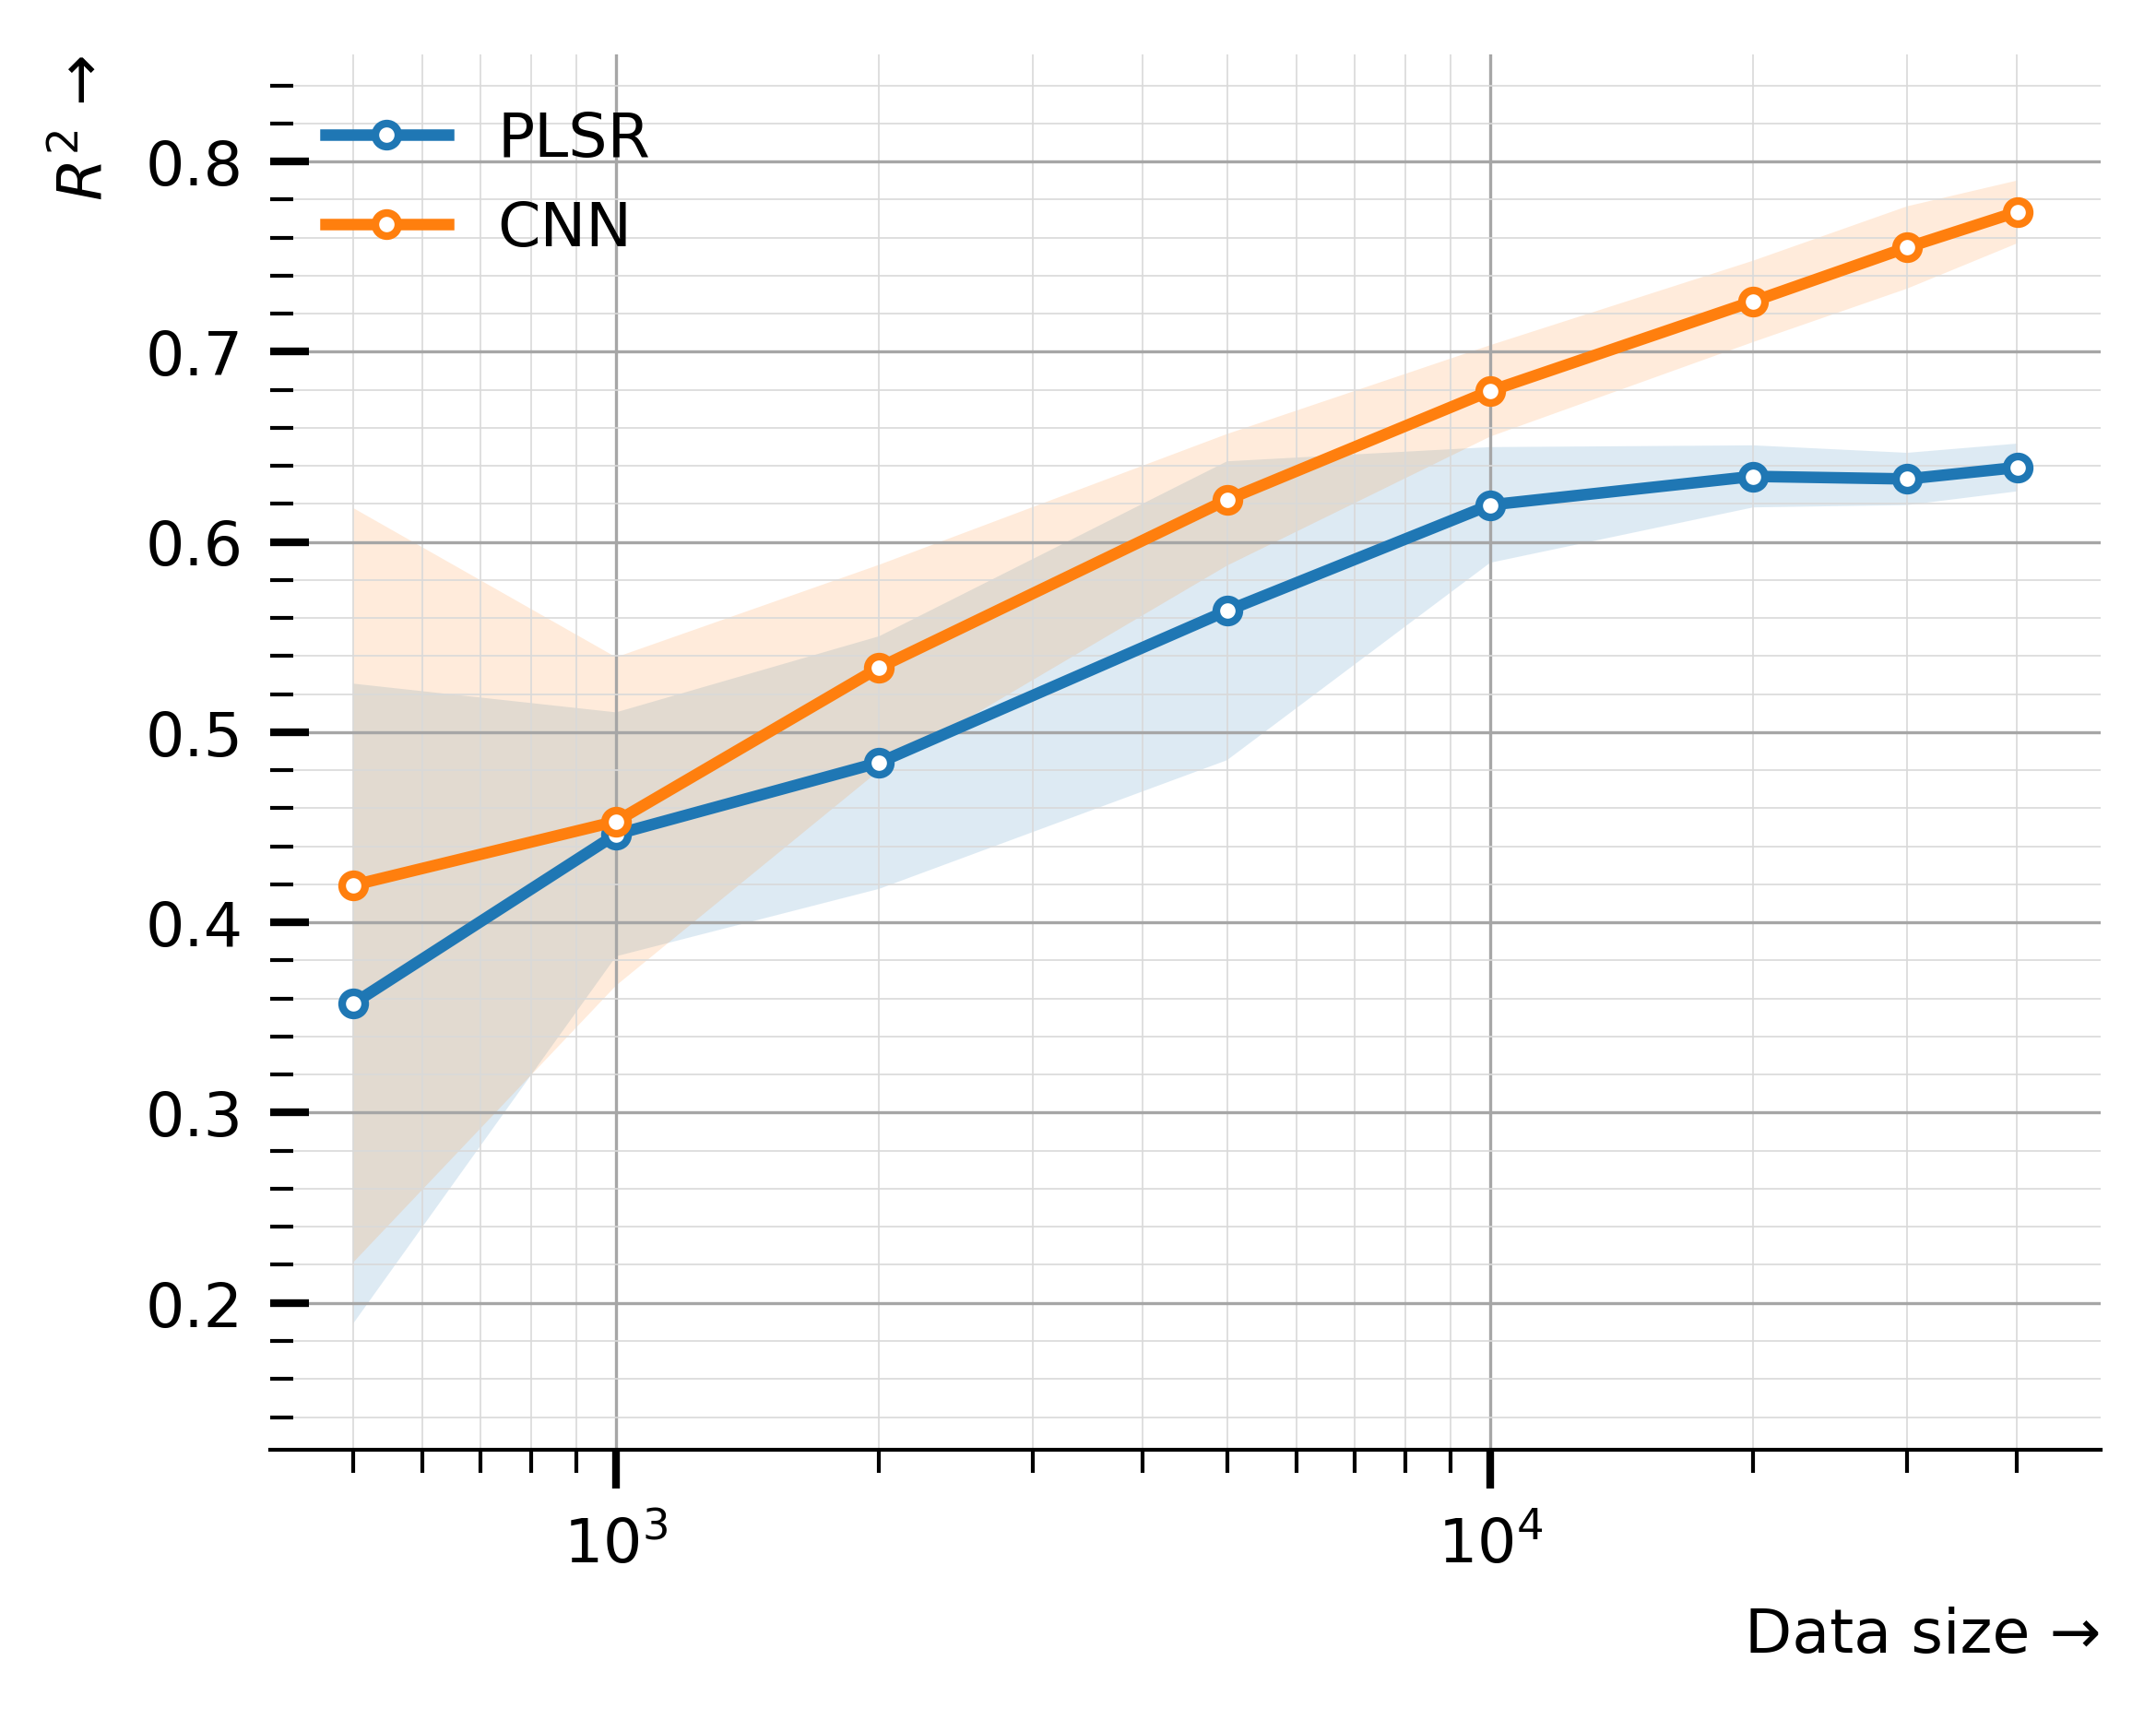

In [ ]:
FIG_PATH = Path('images/')
set_style(DEFAULT_STYLE)
plot_learning_curves(history_plsr, history_cnn)

# To save/export it
plt.savefig(FIG_PATH/'learning-curves.png', dpi=600, transparent=True, format='png')